In [2]:
%run "01 - Data Processing.ipynb"  # Data Processing Library Import

# Dataset Class Distribution

Loading Chromagram Files: 100%|██████████| 300/300 [00:00<00:00, 1529.24it/s]


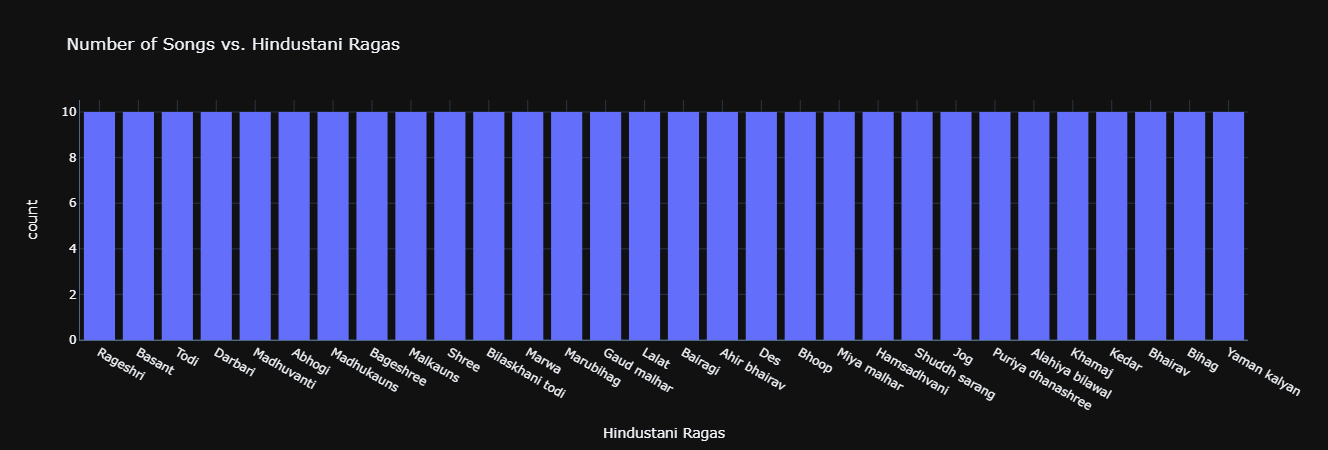

In [3]:
fcd = FullChromaDataset(json_path=config['data']['metadata'],
                        data_folder=config['data']['chroma_folder'],
                        include_mbids=json.load(open(config['data']['limit_songs'])))

raga_list = get_raga_list(fcd)
raga_occurences = [raga_list[raga_id] for raga_id in fcd.y]
fig = px.histogram(x=raga_occurences, labels={'x' : 'Hindustani Ragas',}, title='Number of Songs vs. Hindustani Ragas')
fig.show()

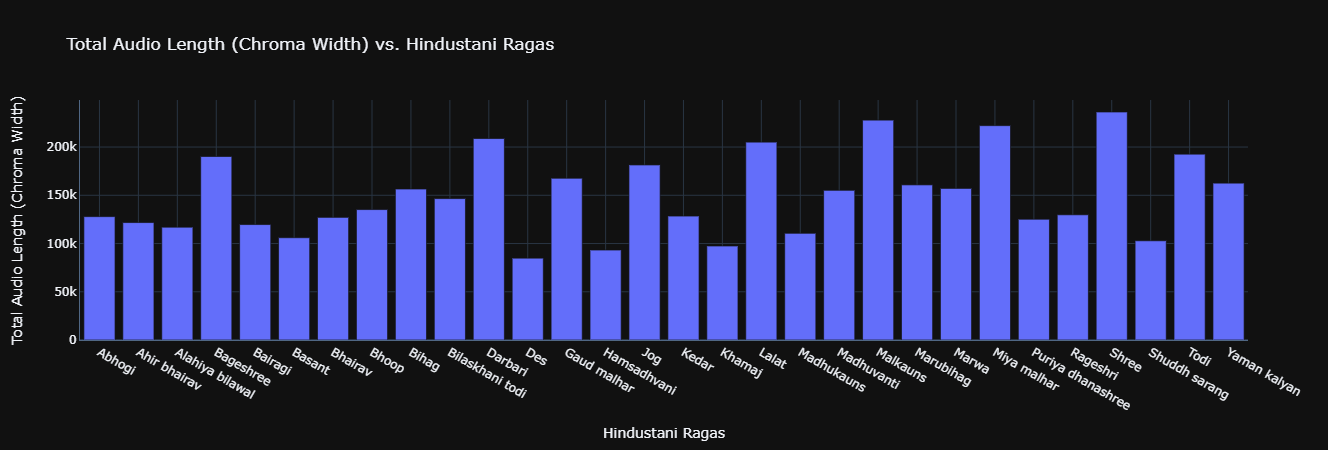

In [4]:
raga_list = get_raga_list(fcd)
lengths = [len(x[0]) for x in fcd.X]
raga_freq = [0] * len(raga_list)
for length, raga_id in zip(lengths, fcd.y):
    raga_freq[raga_id] += length
fig = px.bar(x=raga_list, y=raga_freq, labels={'x' : 'Hindustani Ragas', 'y' : 'Total Audio Length (Chroma Width)'},
             title='Total Audio Length (Chroma Width) vs. Hindustani Ragas')
fig.show()

## Train/Test Split Random Distribution

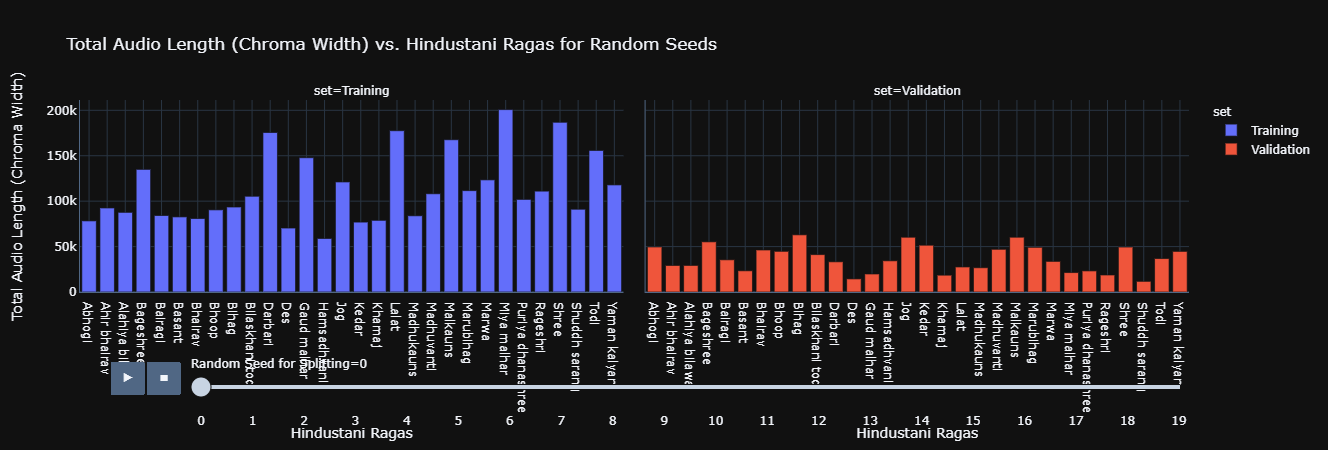

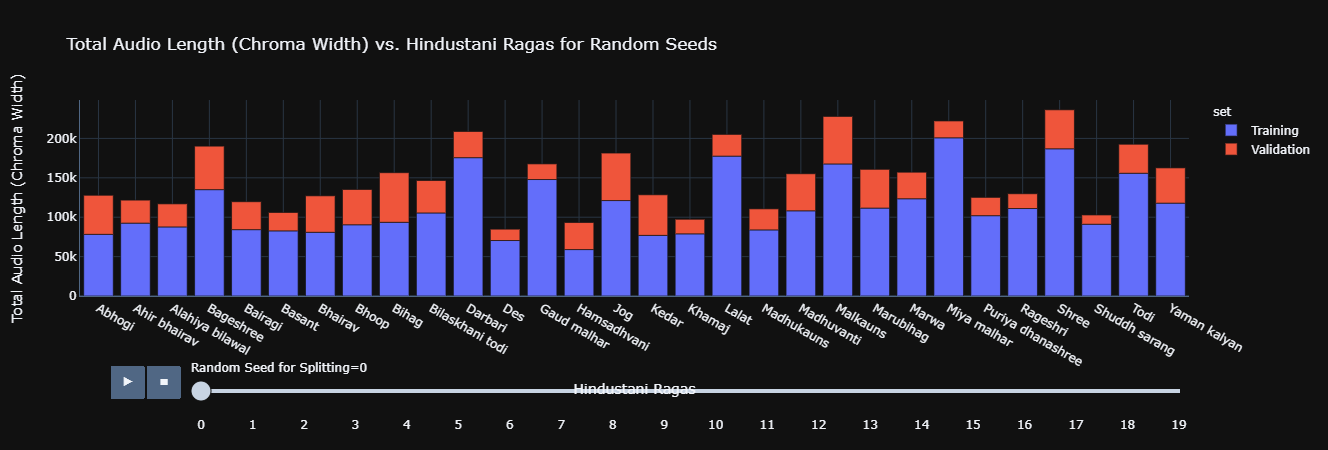

In [5]:
def get_raga_distribution(dataset : FullChromaDataset):
    raga_list = get_raga_list(dataset)
    lengths = [len(x[0]) for x in dataset.X]
    raga_freq = [0] * len(raga_list)
    for length, raga_id in zip(lengths, dataset.y):
        raga_freq[raga_id] += length

    return pd.DataFrame(dict(raga = raga_list, freq = raga_freq))

frames = []

for random_seed in range(20):
    fcd_train, fcd_val = fcd.train_test_split(train_size=0.75, random_state=random_seed)

    for dataset, set_name in [(fcd_train, 'Training'), (fcd_val, 'Validation')]:
        dist = get_raga_distribution(dataset)
        dist['set'] = set_name
        dist['seed'] = random_seed
        frames.append(dist)

df = pd.concat(frames)

fig = px.bar(df, x='raga', y='freq', color='set', facet_col='set', animation_frame='seed', labels={'freq' : 'Total Audio Length (Chroma Width)',
                                                                                'raga' : 'Hindustani Ragas',
                                                                                'seed' : 'Random Seed for Splitting',},
            title='Total Audio Length (Chroma Width) vs. Hindustani Ragas for Random Seeds')
fig.show()

fig = px.bar(df, x='raga', y='freq', color='set', animation_frame='seed',
labels={'freq' : 'Total Audio Length (Chroma Width)',
        'raga' : 'Hindustani Ragas',
        'seed' : 'Random Seed for Splitting',},
title='Total Audio Length (Chroma Width) vs. Hindustani Ragas for Random Seeds')
fig.show()

# Train/Test Split with Greedy Algorithm

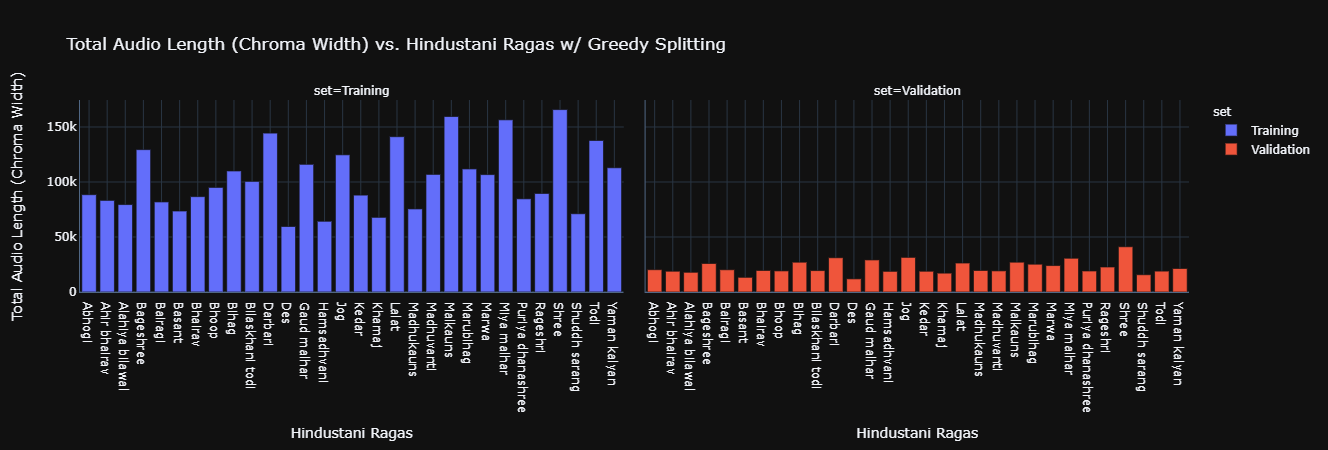

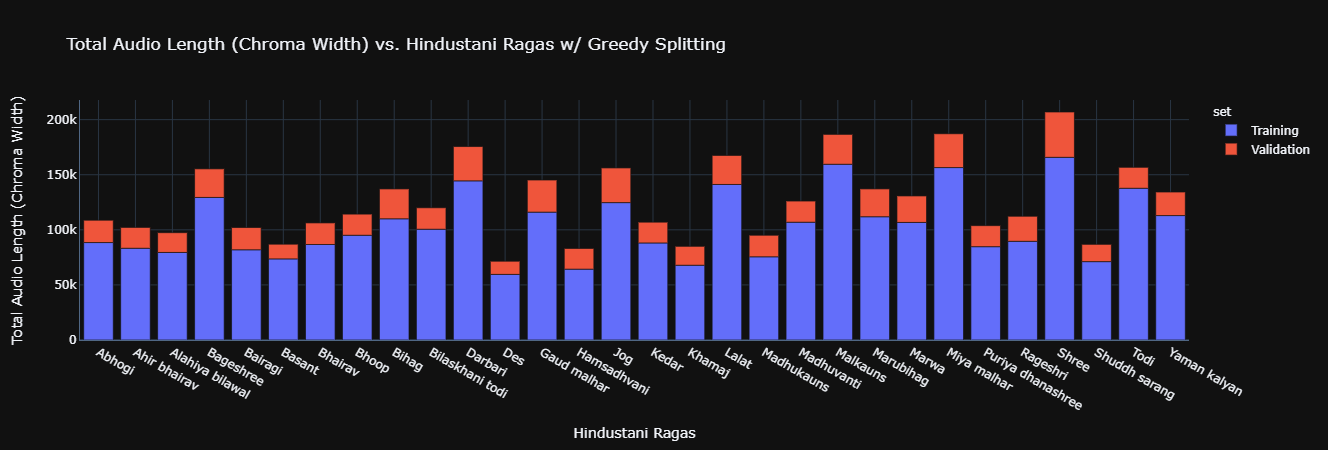

In [7]:
frames = []

data = pd.DataFrame()
fcd_train, fcd_not_train = fcd.greedy_split(train_size=0.70)
fcd_val, fcd_test = fcd_not_train.greedy_split(test_size=0.5)

for dataset, set_name in [(fcd_train, 'Training'), (fcd_val, 'Validation')]:
    dist = get_raga_distribution(dataset)
    dist['set'] = set_name
    frames.append(dist)

df = pd.concat(frames)

fig = px.bar(df, x='raga', y='freq', color='set', facet_col='set', labels={'freq' : 'Total Audio Length (Chroma Width)',
                                                                                'raga' : 'Hindustani Ragas',
                                                                                'seed' : 'Random Seed for Splitting',},
            title='Total Audio Length (Chroma Width) vs. Hindustani Ragas w/ Greedy Splitting')
fig.show()

fig = px.bar(df, x='raga', y='freq', color='set',
labels={'freq' : 'Total Audio Length (Chroma Width)',
        'raga' : 'Hindustani Ragas',
        'seed' : 'Random Seed for Splitting',},
title='Total Audio Length (Chroma Width) vs. Hindustani Ragas w/ Greedy Splitting')
fig.show()